## This computes 2 dimensional wave spectral density from variance density and directional moments that come from Sofar's Spotter Buoys.

In [1]:
from click import progressbar

# import necessary functions

from directional_wave_spectra import estimate_directional_spectrum, get_direction_increment
from roguewavespectrum.spotter import read_spectral_csv
from roguewavespectrum import Spectrum

import matplotlib.pyplot as plt
import xarray as xr
import numpy as np

In [2]:
# the spotter_data dict here is defined as though "frequencyData" was grabbed through the API. It is a single "frequencyData" dict associated with a single time stamp.

spotter_data = {'frequency': [0.0293,
  0.03906,
  0.04883,
  0.05859,
  0.06836,
  0.07813,
  0.08789,
  0.09766,
  0.10742,
  0.11719,
  0.12695,
  0.13672,
  0.14648,
  0.15625,
  0.16602,
  0.17578,
  0.18555,
  0.19531,
  0.20508,
  0.21484,
  0.22461,
  0.23438,
  0.24414,
  0.25391,
  0.26367,
  0.27344,
  0.2832,
  0.29297,
  0.30273,
  0.3125,
  0.32227,
  0.33203,
  0.3418,
  0.35156,
  0.36133,
  0.37109,
  0.38086,
  0.39063,
  0.40039,
  0.41016,
  0.41992,
  0.42969,
  0.43945,
  0.44922,
  0.45898,
  0.46875,
  0.47852,
  0.48828,
  0.49805,
  0.50781,
  0.51758,
  0.52734,
  0.53711,
  0.54688,
  0.55664,
  0.56641,
  0.57617,
  0.58594,
  0.5957,
  0.60547,
  0.61523,
  0.625,
  0.63477,
  0.64453,
  0.6543,
  0.66406,
  0.67383,
  0.68359,
  0.69336,
  0.70313,
  0.71289,
  0.72266,
  0.73242,
  0.74219,
  0.75195,
  0.76172,
  0.77148,
  0.78125,
  0.79102],
 'df': [0.00977,
  0.00977,
  0.00977,
  0.00977,
  0.00977,
  0.00977,
  0.00977,
  0.00977,
  0.00977,
  0.00977,
  0.00977,
  0.00977,
  0.00977,
  0.00977,
  0.00977,
  0.00977,
  0.00977,
  0.00977,
  0.00977,
  0.00977,
  0.00977,
  0.00977,
  0.00977,
  0.00977,
  0.00977,
  0.00977,
  0.00977,
  0.00977,
  0.00977,
  0.00977,
  0.00977,
  0.00977,
  0.00977,
  0.00977,
  0.00977,
  0.00977,
  0.00977,
  0.00977,
  0.00977,
  0.00977,
  0.00977,
  0.00977,
  0.00977,
  0.00977,
  0.00977,
  0.00977,
  0.00977,
  0.00977,
  0.00977,
  0.00977,
  0.00977,
  0.00977,
  0.00977,
  0.00977,
  0.00977,
  0.00977,
  0.00977,
  0.00977,
  0.00977,
  0.00977,
  0.00977,
  0.00977,
  0.00977,
  0.00977,
  0.00977,
  0.00977,
  0.00977,
  0.00977,
  0.00977,
  0.00977,
  0.00977,
  0.00977,
  0.00977,
  0.00977,
  0.00977,
  0.00977,
  0.00977,
  0.00977,
  0.00977],
 'a1': [0.016796,
  -0.111383,
  -0.190037,
  0.219851,
  0.535829,
  0.589661,
  0.574677,
  0.696258,
  0.661399,
  0.71489,
  0.753908,
  0.742944,
  0.699147,
  0.761119,
  0.828591,
  0.794341,
  0.746781,
  0.77048,
  0.74289,
  0.691208,
  0.62282,
  0.69345,
  0.635247,
  0.403755,
  0.331773,
  0.418952,
  0.34541,
  0.242759,
  0.159021,
  0.025293,
  -0.111888,
  -0.016442,
  -0.015593,
  0.015774,
  -0.00293,
  -0.045472,
  -0.074448,
  0.005924,
  0.139888,
  0.06176,
  0.014777,
  -0.24187,
  -0.149321,
  -0.045301,
  0.008516,
  -0.055794,
  0.015089,
  -0.081453,
  -0.051753,
  -0.070179,
  -0.164004,
  -0.169123,
  -0.250416,
  -0.274741,
  -0.216556,
  -0.298374,
  -0.318987,
  -0.376613,
  -0.376504,
  -0.485159,
  -0.497199,
  -0.43356,
  -0.482242,
  -0.455889,
  -0.366919,
  -0.237247,
  -0.235906,
  -0.194596,
  -0.13047,
  -0.081016,
  0.073477,
  0.067448,
  0.079129,
  0.005147,
  0.146125,
  0.243599,
  0.263532,
  0.240239,
  0.290923],
 'b1': [0.035488,
  -0.106,
  -0.000434,
  0.195308,
  0.316915,
  0.315556,
  0.325913,
  0.466195,
  0.441529,
  0.401709,
  0.394191,
  0.370044,
  0.321561,
  0.331807,
  0.314019,
  0.295345,
  0.357675,
  0.368662,
  0.399856,
  0.39313,
  0.385668,
  0.318202,
  0.329232,
  0.302343,
  0.319799,
  0.217597,
  0.070383,
  0.058516,
  0.113161,
  0.216534,
  0.282326,
  0.152172,
  0.096043,
  0.062014,
  0.132201,
  0.185505,
  0.340934,
  0.358599,
  0.262323,
  0.13737,
  -0.020626,
  0.254287,
  0.395611,
  0.349762,
  0.187718,
  0.181411,
  0.248108,
  0.1807,
  0.246996,
  0.127168,
  0.124596,
  0.189902,
  0.203672,
  0.276994,
  0.20373,
  0.124752,
  0.271386,
  0.311291,
  0.130335,
  0.213083,
  0.330225,
  0.261931,
  0.143209,
  0.15438,
  0.177874,
  0.12453,
  0.166126,
  0.160802,
  0.111823,
  -0.050025,
  0.036715,
  0.151654,
  0.063137,
  0.177862,
  0.137239,
  -0.011698,
  0.081087,
  0.152146,
  -0.063026],
 'a2': [0.152208,
  0.249711,
  0.342312,
  0.18193,
  0.282459,
  0.422319,
  0.439925,
  0.298384,
  0.334182,
  0.463609,
  0.493269,
  0.490362,
  0.530557,
  0.609558,
  0.658709,
  0.606758,
  0.54376,
  0.564723,
  0.458789,
  0.393434,
  0.300528,
  0.445479,
  0.44632,
  0.381797,
  0.257242,
  0.15213,
  0.110922,
  0.014987,
  -0.142494,
  -0.215777,
  -0.381143,
  -0.160088,
  -0.233016,
  -0.161389,
  -0.041201,
  -0.097874,
  -0.176675,
  -0.201381,
  -0.284228,
  0.108493,
  0.199823,
  -0.066897,
  -0.358349,
  -0.244736,
  0.17423,
  0.124847,
  -0.16002,
  -0.177771,
  -0.19729,
  -0.292724,
  -0.172136,
  -0.147186,
  -0.064195,
  -0.206632,
  -0.137032,
  0.136124,
  0.07676,
  0.015207,
  0.171658,
  0.288281,
  0.322726,
  0.302522,
  0.415821,
  0.488232,
  0.427791,
  0.24962,
  0.342941,
  0.280861,
  0.099647,
  0.068556,
  0.217232,
  0.12735,
  0.130305,
  -0.004302,
  0.00202,
  0.082985,
  -0.089642,
  0.003677,
  -0.021712],
 'b2': [-0.08777,
  -0.003325,
  0.110049,
  0.17381,
  0.565563,
  0.619444,
  0.641408,
  0.782288,
  0.790988,
  0.758606,
  0.746085,
  0.693012,
  0.583454,
  0.635926,
  0.598462,
  0.586606,
  0.673151,
  0.698769,
  0.715065,
  0.626985,
  0.596209,
  0.549105,
  0.493117,
  0.365319,
  0.501823,
  0.37833,
  0.149602,
  0.009333,
  0.16219,
  -0.055826,
  -0.229897,
  -0.120691,
  -0.198856,
  0.003765,
  -0.098712,
  -0.260007,
  -0.202431,
  -0.165796,
  -0.080093,
  -0.160819,
  -0.325289,
  -0.379207,
  -0.177886,
  -0.149024,
  -0.327827,
  -0.167159,
  -0.050308,
  -0.138599,
  -0.337441,
  -0.406845,
  -0.405764,
  -0.423452,
  -0.174806,
  -0.473115,
  -0.455231,
  -0.426687,
  -0.509901,
  -0.589178,
  -0.317666,
  -0.39153,
  -0.631424,
  -0.643502,
  -0.521031,
  -0.503548,
  -0.424366,
  -0.39197,
  -0.420895,
  -0.333524,
  -0.403271,
  -0.40348,
  -0.476742,
  -0.413934,
  -0.269763,
  -0.136324,
  -0.329214,
  -0.078933,
  -0.160541,
  -0.203043,
  0.083506],
 'varianceDensity': [0.002028544,
  0.0045844480000000005,
  0.0035287039999999997,
  0.004827136,
  0.02566656,
  0.022847488,
  0.02228736,
  0.034323455999999995,
  0.033696767999999995,
  0.039108608,
  0.050640896,
  0.038322176,
  0.01905152,
  0.022221824,
  0.018027520000000002,
  0.015397888,
  0.015325183999999999,
  0.015027200000000001,
  0.012752896000000001,
  0.006823936,
  0.004656128,
  0.0043182080000000005,
  0.0033884159999999996,
  0.001584128,
  0.001405952,
  0.001601536,
  0.0011714560000000002,
  0.000858112,
  0.000968704,
  0.0011755519999999998,
  0.0009605120000000001,
  0.0010199039999999999,
  0.000897024,
  0.000538624,
  0.000535552,
  0.000569344,
  0.000647168,
  0.000656384,
  0.000607232,
  0.000668672,
  0.000510976,
  0.0005601279999999999,
  0.000674816,
  0.000539648,
  0.00049664,
  0.000504832,
  0.0004956159999999999,
  0.00042291200000000006,
  0.0005376000000000001,
  0.000518144,
  0.00043315199999999996,
  0.00059392,
  0.001097728,
  0.0012748800000000002,
  0.0012072959999999998,
  0.001265664,
  0.001502208,
  0.001687552,
  0.00160256,
  0.002418688,
  0.0036270079999999997,
  0.0034949119999999998,
  0.0027320319999999997,
  0.0032870399999999998,
  0.0028672,
  0.0023050239999999997,
  0.00258048,
  0.001975296,
  0.0017807360000000002,
  0.001184768,
  0.0012748800000000002,
  0.001521664,
  0.001000448,
  0.0008704,
  0.00124928,
  0.0009144320000000001,
  0.000743424,
  0.0004884479999999999,
  0.0006502400000000001],
 'direction': [205.327573326638,
  46.41851093813102,
  89.8691500861521,
  228.3832232627188,
  239.39789174552254,
  241.84661924083974,
  240.44139633795098,
  236.19483524059416,
  236.27418325176845,
  240.667618003448,
  242.3965728086823,
  243.52311833404767,
  245.30072316547358,
  246.44538444075135,
  249.2443190423208,
  249.60429442274165,
  244.407644719578,
  244.429652489805,
  241.70891269045805,
  240.37060424850932,
  238.2330210413131,
  245.35112531679383,
  242.60346722625235,
  233.17310742275313,
  226.052811428458,
  242.55335362835652,
  258.4827121371798,
  256.4476320031129,
  234.56394908744434,
  186.66243917736728,
  158.38119018113122,
  173.83318451642873,
  170.7782437037086,
  194.27121934585034,
  178.73034882790313,
  166.22691777967776,
  167.6819744266155,
  180.9464313240361,
  208.0694940117499,
  204.20814509867728,
  324.3812087825337,
  136.43360512972527,
  159.3212865116754,
  172.62016251622262,
  182.59749485734866,
  162.90441769185057,
  183.480228423055,
  155.7358770585974,
  168.16603089496255,
  151.10742751212888,
  127.22441563943954,
  138.31236643359802,
  129.1226514597003,
  135.23396498998048,
  133.25202918028165,
  112.69010397763142,
  130.39028847434696,
  129.57557142197115,
  109.09440144743053,
  113.71119672614176,
  123.59094702613709,
  121.13785907037891,
  106.53957718261236,
  108.70790265045252,
  115.86305413696203,
  117.69480111143895,
  125.15336812509514,
  129.56820419593572,
  130.59916082904508,
  58.30588839718166,
  243.4496105327279,
  203.977069854582,
  231.41364636002965,
  181.6575721625349,
  226.7961473754895,
  272.7493196988535,
  252.89722519755068,
  237.65347001527945,
  282.223746301709],
 'directionalSpread': [79.42187159787224,
  74.539139665756,
  72.92393369522492,
  68.0796219830425,
  49.78252204284863,
  46.632800497076076,
  47.20136165978727,
  32.62119772048318,
  36.66628980924688,
  34.37526476309065,
  31.30436101367752,
  33.408991136206666,
  38.89784089397099,
  33.379406258910315,
  27.34650904477243,
  31.645686092463674,
  33.603115141544535,
  30.94633729203672,
  32.03804099462703,
  36.67061291674253,
  41.90352784037095,
  39.449179161350436,
  43.219816646952225,
  57.04254884078512,
  59.49891408509441,
  58.87317521937648,
  65.20109058232046,
  70.18618665772826,
  72.6923134965991,
  71.65380895517659,
  67.61441840324694,
  74.57006890456137,
  76.98554987766863,
  78.39316041223182,
  75.48124920786714,
  72.88073246908841,
  65.37909105662581,
  64.89121131706531,
  67.92432818757038,
  74.67753565940224,
  79.99389407096378,
  65.27969289602201,
  61.557472283435,
  65.19225078926728,
  73.01959600129656,
  72.93475685781883,
  70.23974626950262,
  72.5551145137723,
  70.06223607605008,
  74.91311543143871,
  72.2033792121305,
  69.97155002577313,
  66.68079445650676,
  63.27805588887851,
  67.9226696386382,
  66.65033919683844,
  61.772636650690096,
  57.94472065340605,
  62.84670645799457,
  55.55680783990852,
  51.446930437297546,
  56.91986868021092,
  57.1203681112824,
  58.35630782906224,
  62.35715260991654,
  69.32818856348128,
  68.34645044930234,
  70.05857055364577,
  73.73886008757657,
  77.07438683866299,
  77.62936314734537,
  73.99916134454631,
  76.81777350742814,
  73.46666481855839,
  72.4529043799997,
  70.45844830566854,
  68.95875463746344,
  68.54622798267434,
  67.90592979570751],
 'timestamp': '2025-05-08T21:00:00.000Z',
 'latitude': -35.0278,
 'longitude': 138.45047}

In [3]:
# define arrays to compute 2 dimensional spectra

frequency = np.array(spotter_data['frequency'])
variance_density = np.array(spotter_data['varianceDensity'])
a1 = np.array(spotter_data['a1'])
b1 = np.array(spotter_data['b1'])
a2 = np.array(spotter_data['a2'])
b2 = np.array(spotter_data['b2'])

direction = np.linspace(0, 360, 180, endpoint=True) # 2 degree resolution, arbitrarily chosen

In [4]:
twoD_spectra = estimate_directional_spectrum(variance_density, a1, b1, a2, b2, direction)

In [5]:
coords = {
    "frequency": spotter_data["frequency"],
    "latitude": spotter_data["latitude"],
    "longitude": spotter_data["longitude"],
    "timestamp": spotter_data["timestamp"],  # optional, for completeness
}

# Variables (aligned along frequency)
data_vars = {
    "a1": ("frequency", spotter_data["a1"]),
    "b1": ("frequency", spotter_data["b1"]),
    "a2": ("frequency", spotter_data["a2"]),
    "b2": ("frequency", spotter_data["b2"]),
    "variance_density": ("frequency", spotter_data["varianceDensity"]),
}

# Create the dataset
spotter_ds = xr.Dataset(data_vars=data_vars, coords=coords)

Spec = Spectrum.from_dataset(spotter_ds)
orig_2d = Spec.as_frequency_direction_spectrum(number_of_directions=180)

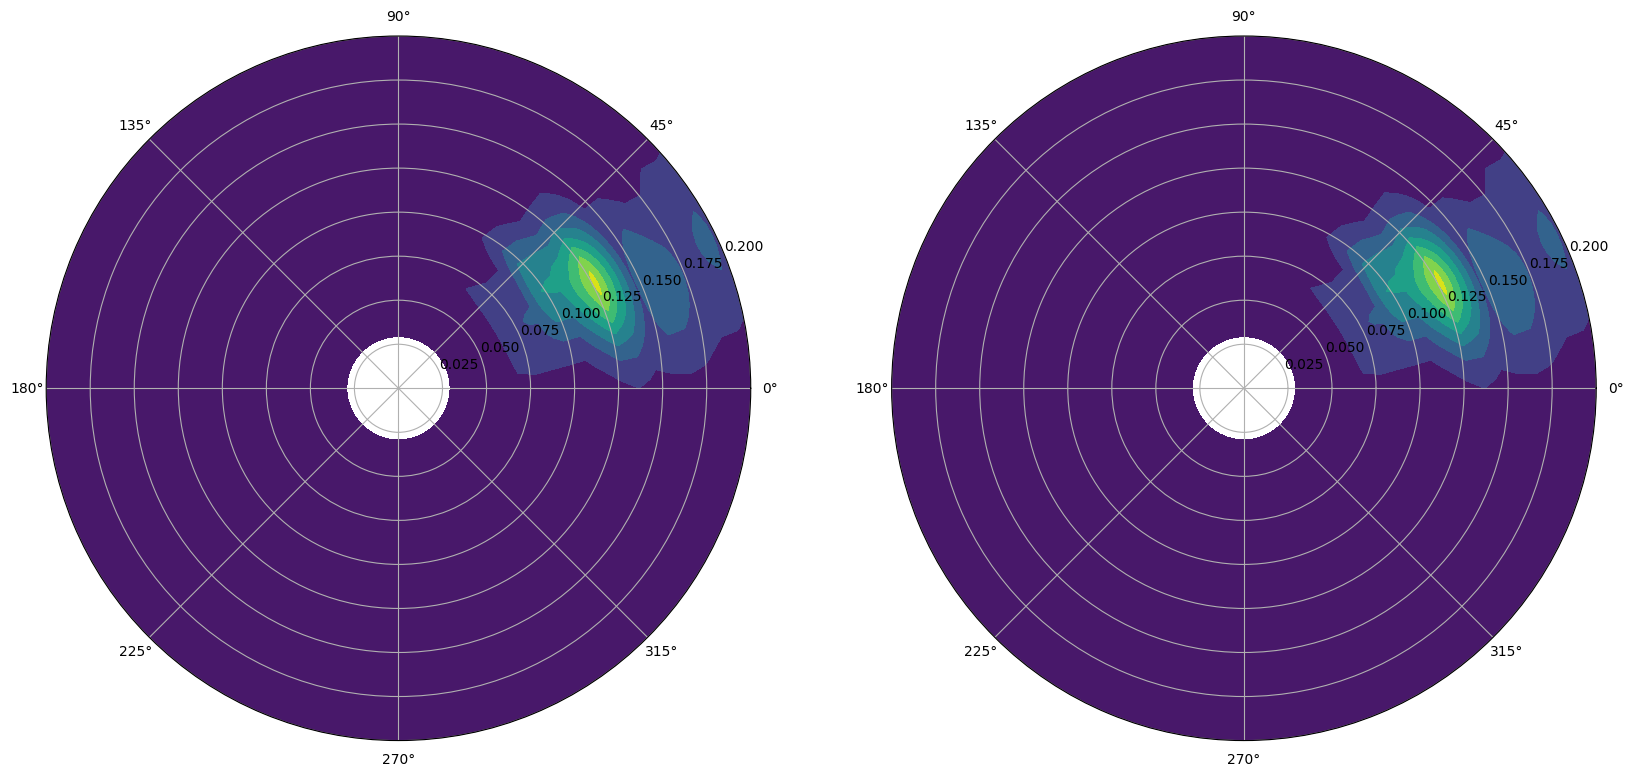

In [6]:
fig, ax = plt.subplots(1,2,figsize=(20, 10), subplot_kw=dict(projection='polar'))
ax = ax.flatten()
theta = np.deg2rad(direction)
im = ax[0].contourf(theta, frequency, twoD_spectra, cmap='viridis')
ax[0].set_xlim([0*np.pi,2*np.pi])
ax[0].set_ylim([0,0.2])
ax[0].set_theta_zero_location("E")
ax[0].grid('on')

im = ax[1].contourf(theta, orig_2d.frequency, orig_2d.values, cmap='viridis')
ax[1].set_xlim([0*np.pi,2*np.pi])
ax[1].set_ylim([0,0.2])
ax[1].set_theta_zero_location("E")
ax[1].grid('on')
#plt.colorbar(im,shrink=0.5)

In [7]:
multi_dim = read_spectral_csv('/Users/annasavage/Documents/sd-card-data/smart_drifter/32202_drifter/log')

In [8]:
orig_multi = multi_dim.as_frequency_direction_spectrum(number_of_directions=180)

Reconstructing 2d spectrum with mem2 using solution_method scipy:   0%|          | 0/815 [00:00<?, ?it/s]

In [9]:
a1 = multi_dim.a1.values
b1 = multi_dim.b1.values
a2 = multi_dim.a2.values
b2 = multi_dim.b2.values
variance_density = multi_dim.variance_density.values

In [10]:
tst_multi = estimate_directional_spectrum(variance_density, a1, b1, a2, b2, direction)

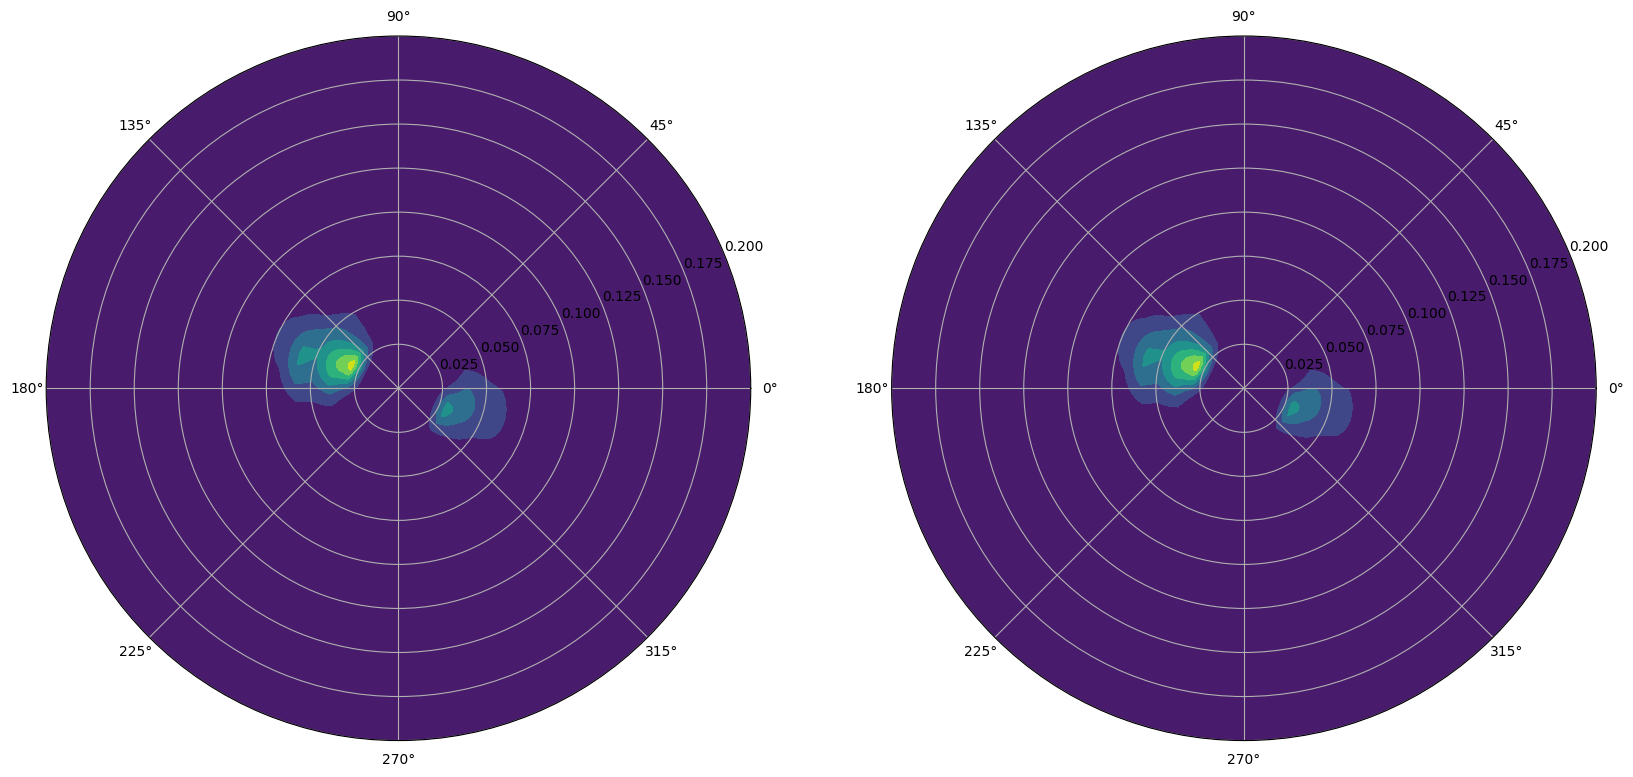

In [11]:
fig, ax = plt.subplots(1,2,figsize=(20, 10), subplot_kw=dict(projection='polar'))
ax = ax.flatten()
theta = np.deg2rad(direction)
im = ax[0].contourf(theta, orig_multi.frequency, tst_multi[0,:], cmap='viridis')
ax[0].set_xlim([0*np.pi,2*np.pi])
ax[0].set_ylim([0,0.2])
ax[0].set_theta_zero_location("E")
ax[0].grid('on')

im = ax[1].contourf(theta, orig_multi.frequency, orig_multi.values[0,:], cmap='viridis')
ax[1].set_xlim([0*np.pi,2*np.pi])
ax[1].set_ylim([0,0.2])
ax[1].set_theta_zero_location("E")
ax[1].grid('on')

In [12]:
tst = get_direction_increment(theta)

In [13]:
tst

array([0.0175508 , 0.03510159, 0.03510159, 0.03510159, 0.03510159,
       0.03510159, 0.03510159, 0.03510159, 0.03510159, 0.03510159,
       0.03510159, 0.03510159, 0.03510159, 0.03510159, 0.03510159,
       0.03510159, 0.03510159, 0.03510159, 0.03510159, 0.03510159,
       0.03510159, 0.03510159, 0.03510159, 0.03510159, 0.03510159,
       0.03510159, 0.03510159, 0.03510159, 0.03510159, 0.03510159,
       0.03510159, 0.03510159, 0.03510159, 0.03510159, 0.03510159,
       0.03510159, 0.03510159, 0.03510159, 0.03510159, 0.03510159,
       0.03510159, 0.03510159, 0.03510159, 0.03510159, 0.03510159,
       0.03510159, 0.03510159, 0.03510159, 0.03510159, 0.03510159,
       0.03510159, 0.03510159, 0.03510159, 0.03510159, 0.03510159,
       0.03510159, 0.03510159, 0.03510159, 0.03510159, 0.03510159,
       0.03510159, 0.03510159, 0.03510159, 0.03510159, 0.03510159,
       0.03510159, 0.03510159, 0.03510159, 0.03510159, 0.03510159,
       0.03510159, 0.03510159, 0.03510159, 0.03510159, 0.03510

In [14]:
np.diff(theta)

array([0.03510159, 0.03510159, 0.03510159, 0.03510159, 0.03510159,
       0.03510159, 0.03510159, 0.03510159, 0.03510159, 0.03510159,
       0.03510159, 0.03510159, 0.03510159, 0.03510159, 0.03510159,
       0.03510159, 0.03510159, 0.03510159, 0.03510159, 0.03510159,
       0.03510159, 0.03510159, 0.03510159, 0.03510159, 0.03510159,
       0.03510159, 0.03510159, 0.03510159, 0.03510159, 0.03510159,
       0.03510159, 0.03510159, 0.03510159, 0.03510159, 0.03510159,
       0.03510159, 0.03510159, 0.03510159, 0.03510159, 0.03510159,
       0.03510159, 0.03510159, 0.03510159, 0.03510159, 0.03510159,
       0.03510159, 0.03510159, 0.03510159, 0.03510159, 0.03510159,
       0.03510159, 0.03510159, 0.03510159, 0.03510159, 0.03510159,
       0.03510159, 0.03510159, 0.03510159, 0.03510159, 0.03510159,
       0.03510159, 0.03510159, 0.03510159, 0.03510159, 0.03510159,
       0.03510159, 0.03510159, 0.03510159, 0.03510159, 0.03510159,
       0.03510159, 0.03510159, 0.03510159, 0.03510159, 0.03510